In [2]:
import MyFlow as mf
import numpy as np
import Enviornment
from tqdm import tqdm
import testEnv
from IPython.display import clear_output
import time

In [3]:
env = Enviornment.Space2048()

In [7]:
t = mf.GeneticTrainer(env,100,[512,512],[np.tanh,np.tanh,np.tanh,np.tanh],25000,0.1,20,50,1)

In [8]:
t.num_threads = 4

40 games - 256 pop
No threads 48.9
2 threads = 24.75
4 threads = 13.95
8 threads = 12.18
16 threads = 14.4

80 games - 256 pop
No threads = ?
2 threads = 48.9
4 threads = 26.95
8 threads = 22.65
16 threads = 24.85

40 games - 512 pop
No threads = ?
2 threads = 49.15
4 threads = 28.48
8 threads = 24.4
16 threads = 27.34

Generation:  45  Top Score:  1612  Time:  13.162776947021484


100%|██████████| 50/50 [07:06<00:00,  8.53s/it]


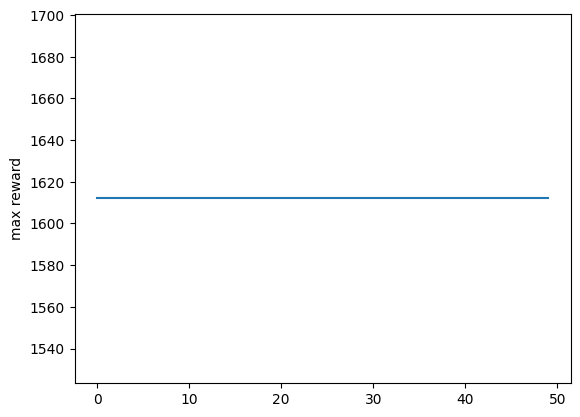

In [10]:
agents = t.train(True,freq=5)

In [45]:
top = agents[0]

In [48]:
myenv = Enviornment.Space2048()
play_good_agent(top)

[2, 8, 2, 4]
[8, 16, 4, 16]
[16, 2, 16, 64]
[4, 8, 64, 2]


[2, 8, 2, 4]
[8, 16, 4, 16]
[16, 2, 16, 64]
[4, 8, 64, 2]


[2, 8, 2, 4]
[8, 16, 4, 16]
[16, 2, 16, 64]
[4, 8, 64, 2]


[2, 8, 2, 4]
[8, 16, 4, 16]
[16, 2, 16, 64]
[4, 8, 64, 2]




In [49]:
myenv.currentgame.printBoard()

[2, 8, 2, 4]
[8, 16, 4, 16]
[16, 2, 16, 64]
[4, 8, 64, 2]




In [47]:
def play_good_agent(agent):
    isover, state, reward = myenv.reset()
    while not isover:
        myenv.currentgame.printBoard()
        time.sleep(0.1)
        clear_output(wait=True)
        actionprobs = agent.network.calculate(state)
        isover, newstate, reward = myenv.step(actionprobs)
        step = 0
        while state == newstate and step < 10:
            actionprobs[np.argmax(actionprobs)] = 0
            isover, newstate, reward = myenv.step(actionprobs)
            step += 1
        state = newstate
    myenv.currentgame.printBoard()
    myenv.currentgame.printBoard()
    myenv.currentgame.printBoard()
    myenv.currentgame.printBoard()